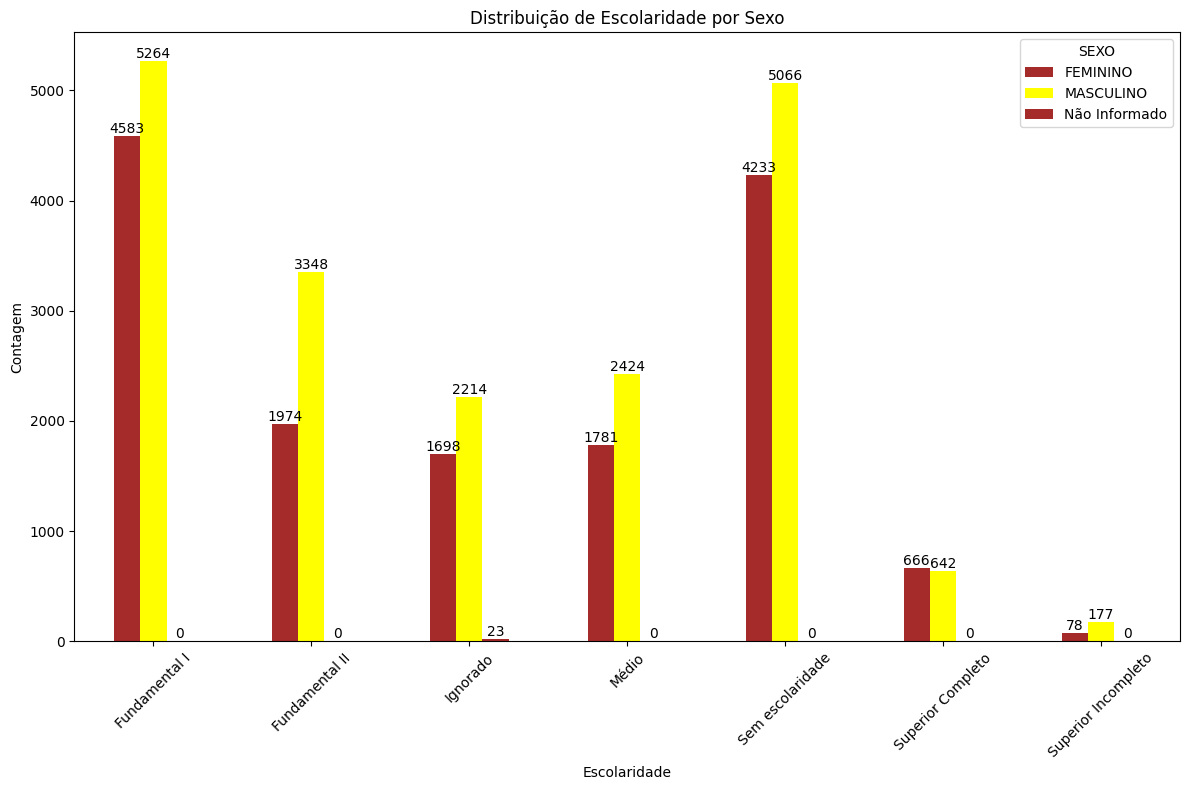

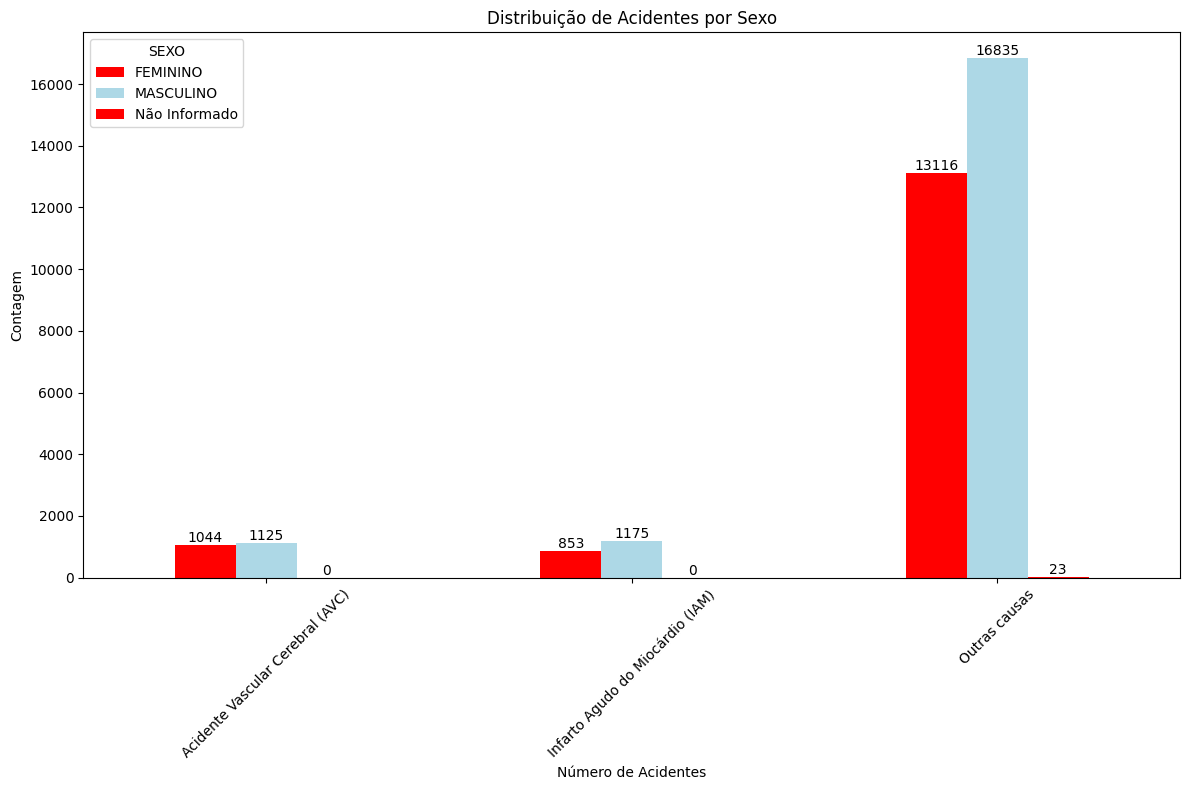

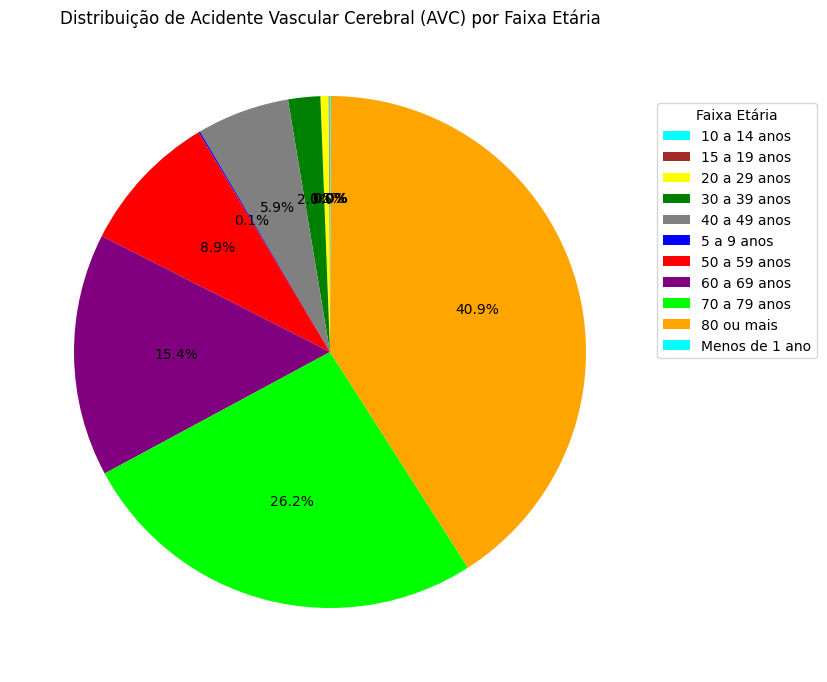

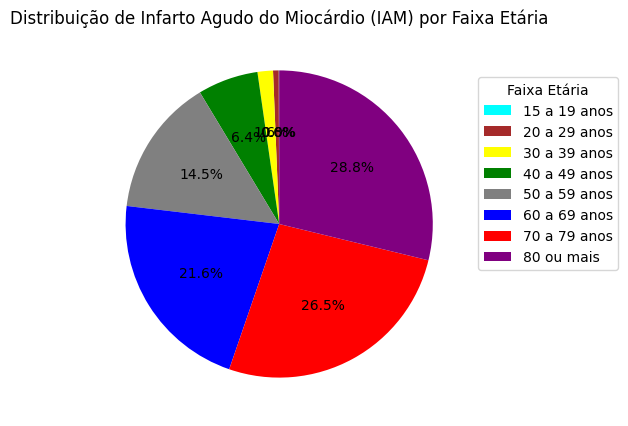

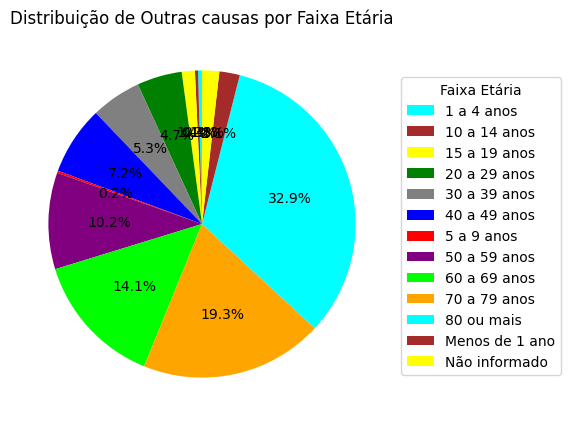

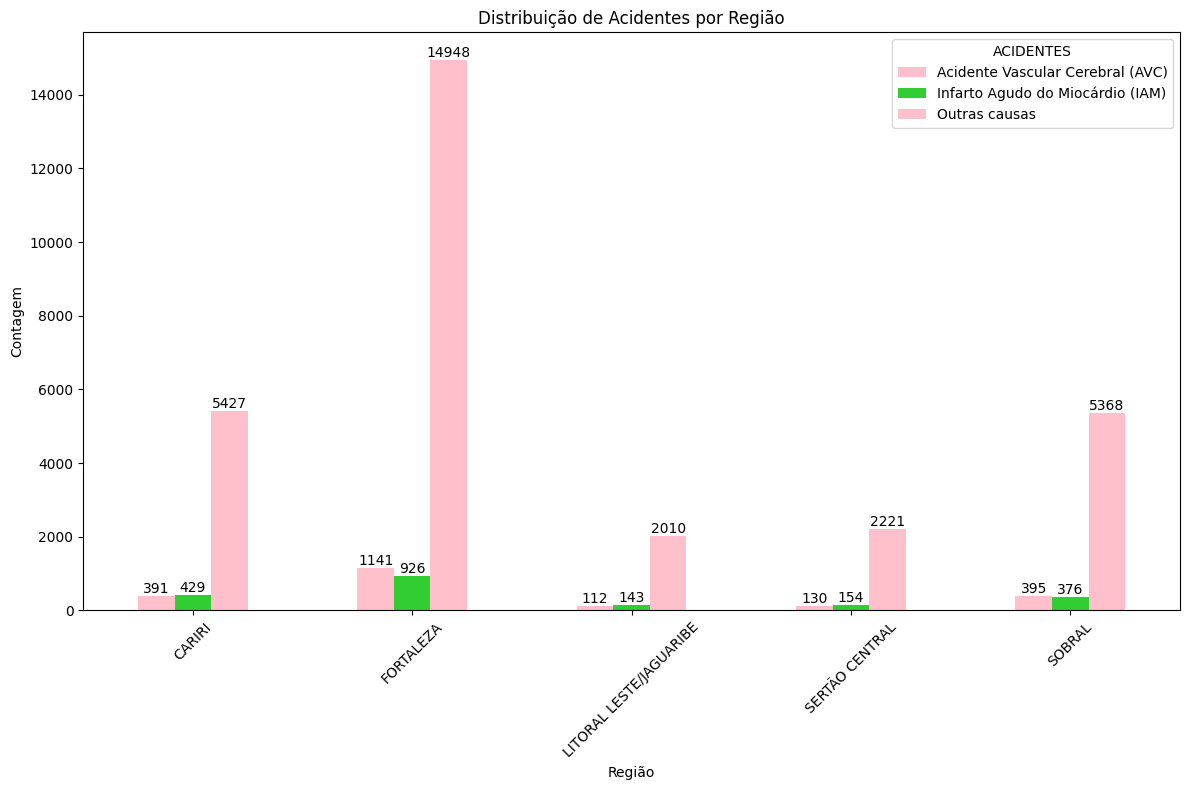

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('cenario-mortalidade-ceara_2024-09-03_19-25-49.csv', encoding='ISO-8859-1', sep=';')

df_grouped = df.groupby(['ESCOLARIDADE', 'SEXO']).size().unstack()
df_grouped2 = df.groupby(['ACIDENTES', 'SEXO']).size().unstack()
df_grouped3 = df.groupby(['RACA', 'ACIDENTES']).size().unstack()
df_grouped4 = df.groupby(['FAIXA_ETÁRIA', 'ACIDENTES']).size().unstack()
df_grouped5 = df.groupby(['NOME_REGIAO', 'ACIDENTES']).size().unstack()

# Função para adicionar valores numéricos nas barras
def add_values(ax):
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10)

# Gráfico 1: Escolaridade e Sexo
ax1 = df_grouped.plot(kind='bar', figsize=(12, 8), color=['brown', 'yellow'], stacked=False)
ax1.set_title('Distribuição de Escolaridade por Sexo')
ax1.set_xlabel('Escolaridade')
ax1.set_ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
add_values(ax1)  

# Gráfico 2: Acidentes e Sexo
ax2 = df_grouped2.plot(kind='bar', figsize=(12, 8), color=['red', 'lightblue'], stacked=False)
ax2.set_title('Distribuição de Acidentes por Sexo')
ax2.set_xlabel('Número de Acidentes')
ax2.set_ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
add_values(ax2)

# Gráfico 3: Raça e Acidentes
ax3 = df_grouped3.plot(kind='bar', figsize=(12, 8), color=['green', 'grey'], stacked=False)
ax3.set_title('Distribuição de Raça por Número de Acidentes')
ax3.set_xlabel('Raça')
ax3.set_ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
add_values(ax3)  

# Gráfico 4: Faixa Etária e Acidentes - Gráfico de Torta (Ajustado)
for column in df_grouped4.columns:
    plt.clf() 

    sizes = df_grouped4[column].dropna().astype(float)

    if sizes.empty:
        print(f"Sem dados para {column}, pulando...")
        continue

    plt.pie(
        sizes, 
        autopct='%1.1f%%',  
        startangle=90, 
        colors=['cyan', 'brown', 'yellow', 'green', 'grey', 'blue', 'red', 'purple', 'lime', 'orange'],  
        labels=None  
    )
    
    plt.title(f'Distribuição de {column} por Faixa Etária')
    plt.ylabel('')  
    
    plt.legend(
        labels=sizes.index,  
        loc='upper left', 
        bbox_to_anchor=(1, 0.9), 
        fontsize=10, 
        title='Faixa Etária'
    )
    
    plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)
    plt.show()

# Gráfico 5: Região e Acidentes
ax5 = df_grouped5.plot(kind='bar', figsize=(12, 8), color=['pink', 'limegreen'], stacked=False)
ax5.set_title('Distribuição de Acidentes por Região')
ax5.set_xlabel('Região')
ax5.set_ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
add_values(ax5)  